In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from scipy.stats import skew
import scipy.stats as stat
import pylab
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import kstest
import plotly_express as px

In [5]:
product_data = pd.read_excel("D:/UoE_Notes/Assignment/Group_Project/Final_Data/_nosh_product_data.xlsx")
product_data

,product_id,product,shelf_life,usual_storage,calories,serving_size_g,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
0,1,spaghetti,NaN,pantry,154.1,100,0.6,0.1,5.3,4,75,0,30.6,1.3,1.1
1,2,onion,13.0,pantry,44.7,100,0.2,0.0,1.4,2,35,0,10.1,1.4,4.7
2,3,sugar,NaN,pantry,385.6,100,0.0,0.0,0.0,0,0,0,99.8,0.0,100.1
3,4,mustard,60.0,pantry,58.3,100,3.4,0.2,3.8,1125,106,0,5.7,4.0,1.0
4,5,tomato sauce,NaN,pantry,24.6,100,0.3,0.0,1.2,472,26,0,5.4,1.5,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,cooked broccoli,7.0,fridge,35.0,100,0.4,0.1,2.4,41,65,0,7.3,3.3,1.4
206,207,mushroom,7.0,fridge,28.0,100,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
207,208,cooked mushroom,7.0,fridge,28.0,100,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
208,209,sliced mushroom,5.0,fridge,28.0,100,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3


sns.pairplot(product_data)

In [3]:
df = product_data.copy()
items = ["product_id","product","usual_storage","serving_size_g","shelf_life"]
df = df.drop(items,axis=1)
df

,calories,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
0,154.1,0.6,0.1,5.3,4,75,0,30.6,1.3,1.1
1,44.7,0.2,0.0,1.4,2,35,0,10.1,1.4,4.7
2,385.6,0.0,0.0,0.0,0,0,0,99.8,0.0,100.1
3,58.3,3.4,0.2,3.8,1125,106,0,5.7,4.0,1.0
4,24.6,0.3,0.0,1.2,472,26,0,5.4,1.5,3.6
...,...,...,...,...,...,...,...,...,...,...
205,35.0,0.4,0.1,2.4,41,65,0,7.3,3.3,1.4
206,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
207,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
208,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3


In [4]:
df.describe()

,calories,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,205.901429,10.204762,3.113333,8.067619,405.680952,133.480952,19.385714,22.203810,3.395238,7.832857
std,184.207395,18.135193,6.129731,9.322684,2679.329109,153.311305,43.966699,24.538781,7.035160,18.027266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.725000,0.200000,0.000000,0.900000,2.000000,23.000000,0.000000,3.625000,0.000000,0.100000
50%,154.100000,0.900000,0.200000,3.550000,29.500000,68.500000,0.000000,13.150000,1.500000,1.450000
75%,301.425000,13.225000,3.550000,12.200000,346.250000,196.250000,2.000000,31.125000,3.075000,4.975000
max,883.000000,101.200000,51.100000,40.400000,38395.000000,638.000000,371.000000,99.800000,53.800000,100.100000


# Q-Q Plot

In [5]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

calories Skewness: 1.1633267961030782


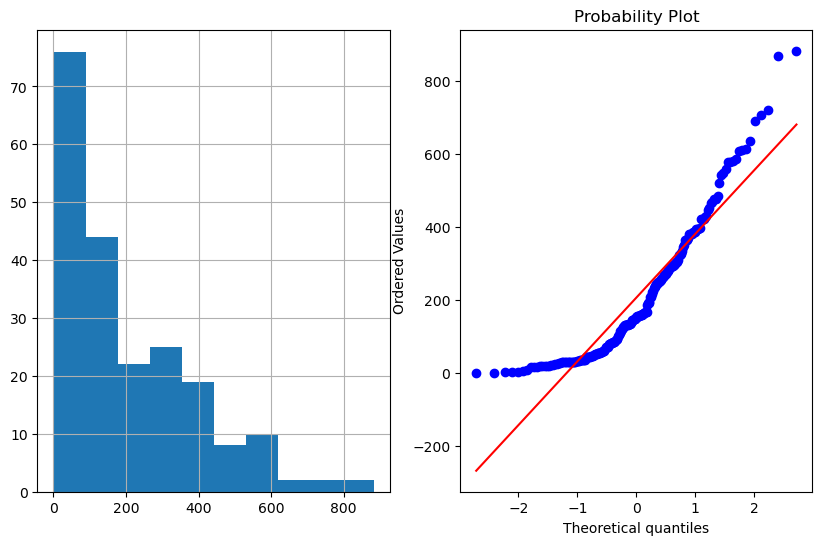

fat_total_g Skewness: 2.5162965009987874


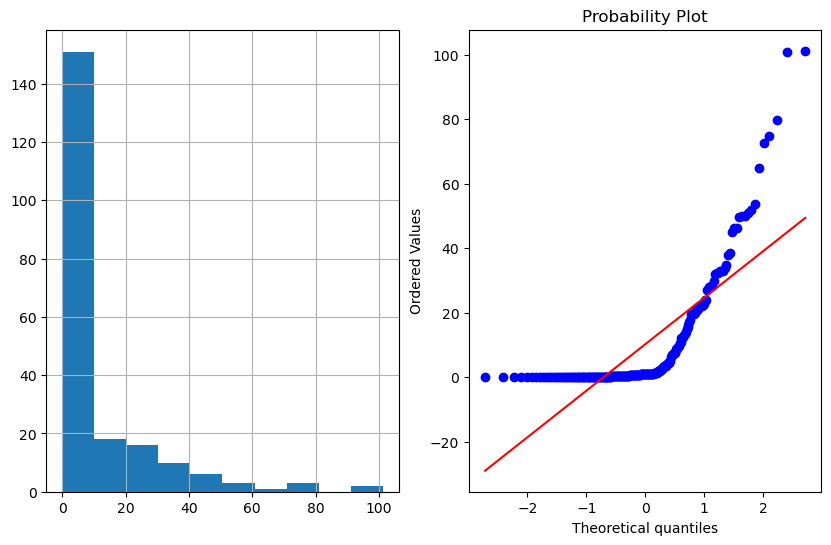

fat_saturated_g Skewness: 3.4717042397395677


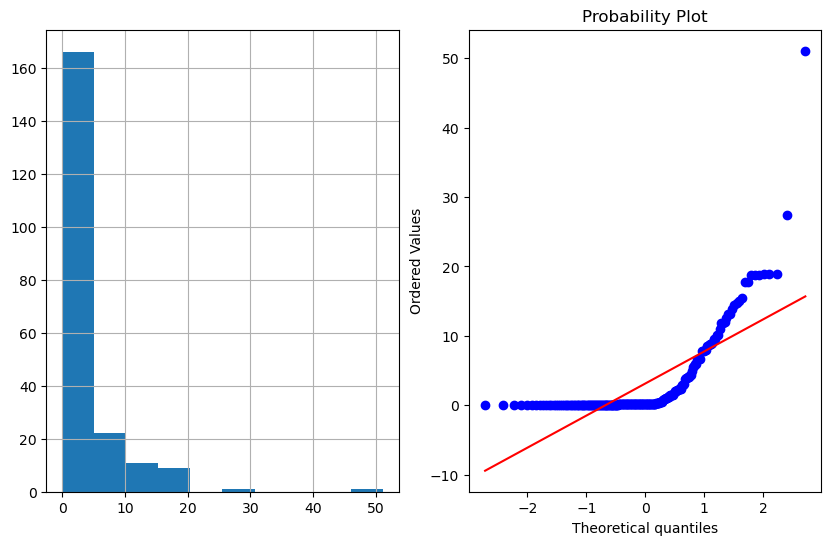

protein_g Skewness: 1.237270602018577


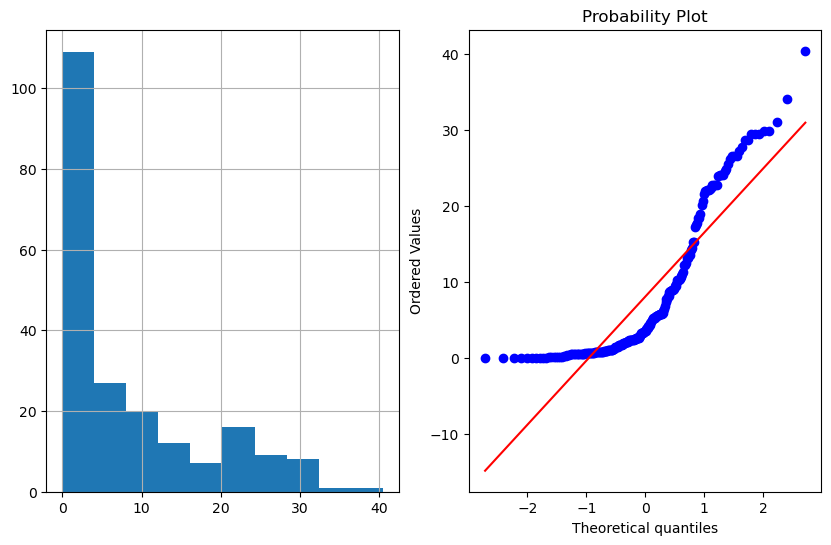

sodium_mg Skewness: 13.702948406498242


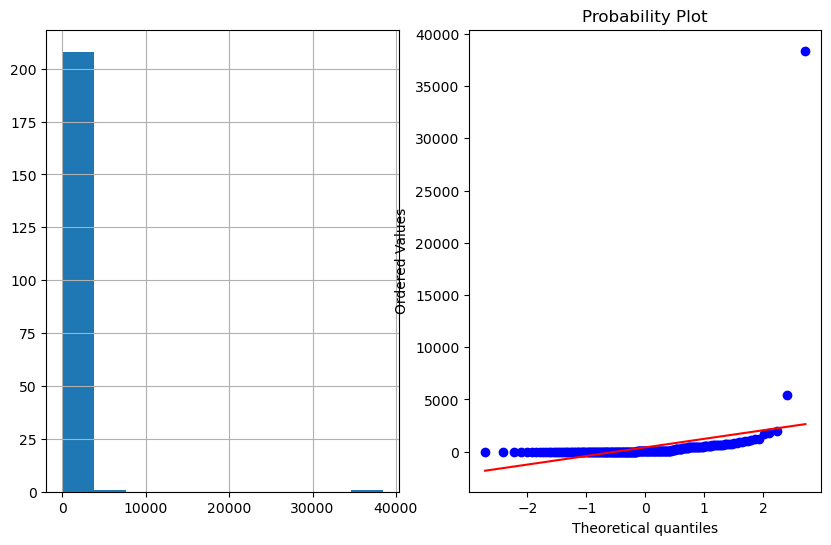

potassium_mg Skewness: 1.4958015090863543


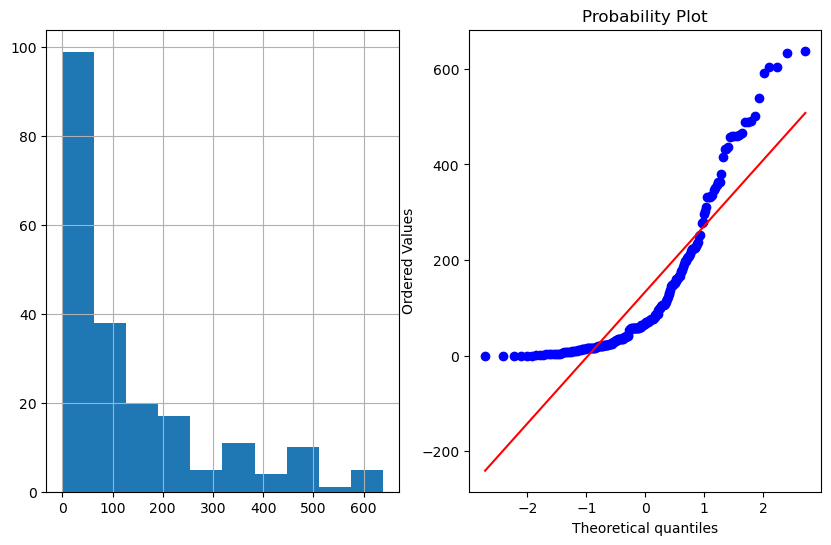

cholesterol_mg Skewness: 3.607196683287366


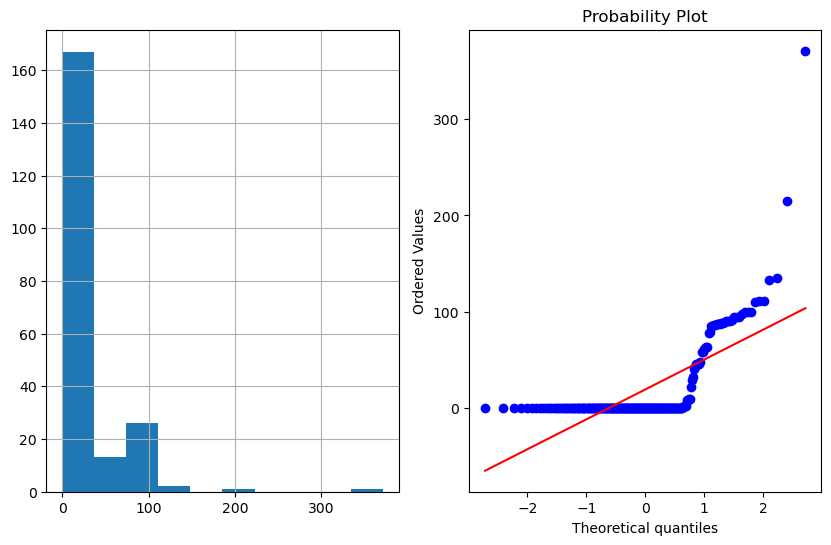

carbohydrates_total_g Skewness: 1.2793903029156712


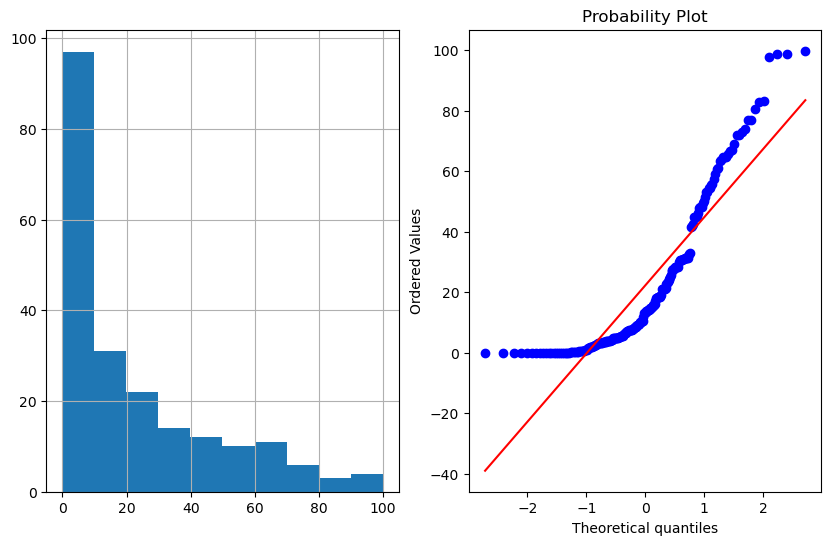

fiber_g Skewness: 4.4576128206618995


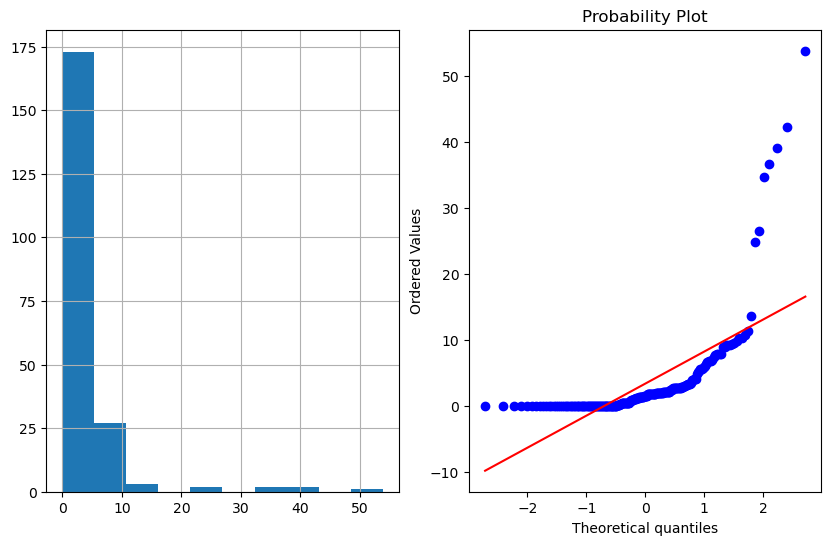

sugar_g Skewness: 3.559724446263068


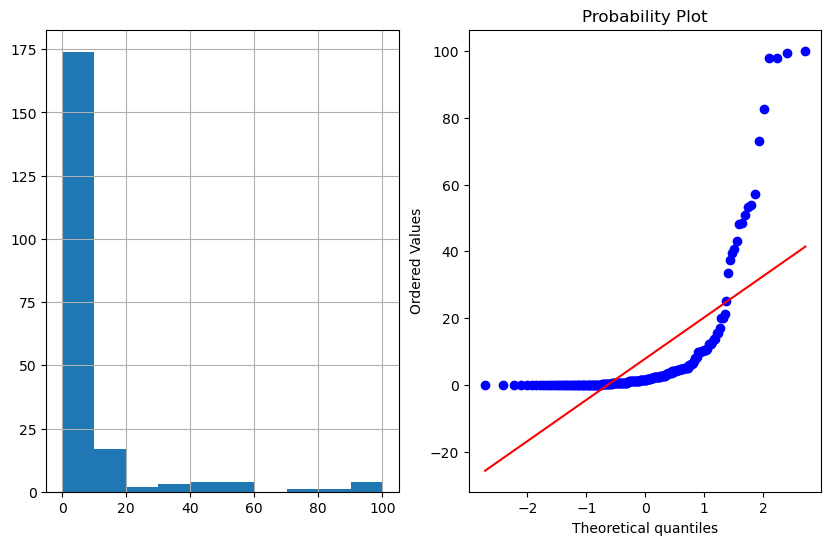

In [6]:
for col in df:
    print(col,'Skewness:',skew(df[col]))
    plot_data(df,col)
    plt.show()

In [7]:
def remove_skewness(data):
    # Calculate the skewness of the data
    skewness = skew(data)
    
    # If the skewness is greater than 0.5 or less than -0.5, transform the data using a log transformation
    if skewness.all() > 0.5 or skewness.all() < -0.5:
        data = np.log1p(data)
        
    return data

In [8]:
df = remove_skewness(df)

In [9]:
df

,calories,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
0,5.044070,0.470004,0.095310,1.840550,1.609438,4.330733,0.0,3.453157,0.832909,0.741937
1,3.822098,0.182322,0.000000,0.875469,1.098612,3.583519,0.0,2.406945,0.875469,1.740466
2,5.957391,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.613138,0.000000,4.616110
3,4.082609,1.481605,0.182322,1.568616,7.026427,4.672829,0.0,1.902108,1.609438,0.693147
4,3.242592,0.262364,0.000000,0.788457,6.159095,3.295837,0.0,1.856298,0.916291,1.526056
...,...,...,...,...,...,...,...,...,...,...
205,3.583519,0.336472,0.095310,1.223775,3.737670,4.189655,0.0,2.116256,1.458615,0.875469
206,3.367296,0.405465,0.095310,1.131402,0.693147,4.477337,0.0,1.840550,1.131402,1.193922
207,3.367296,0.405465,0.095310,1.131402,0.693147,4.477337,0.0,1.840550,1.131402,1.193922
208,3.367296,0.405465,0.095310,1.131402,0.693147,4.477337,0.0,1.840550,1.131402,1.193922


calories Skewness: -1.0936922311085653


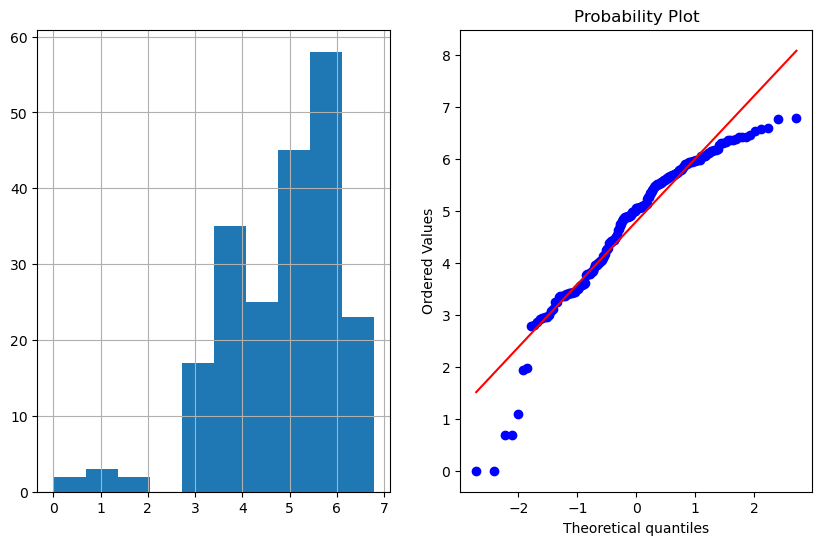

fat_total_g Skewness: 0.7542846649167283


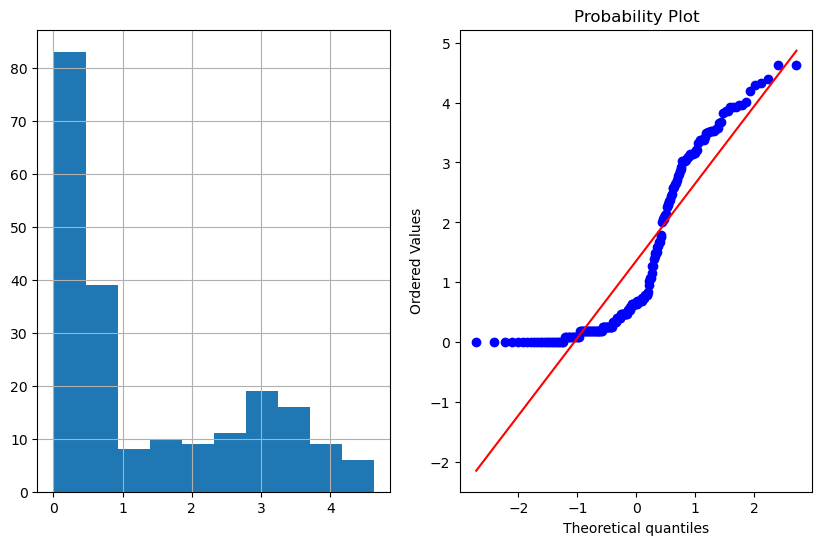

fat_saturated_g Skewness: 1.0970210126621367


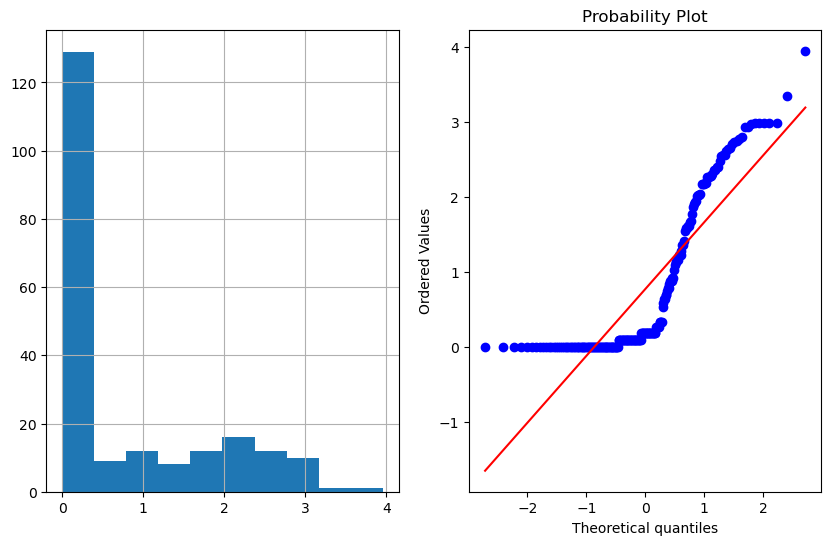

protein_g Skewness: 0.18011803095047285


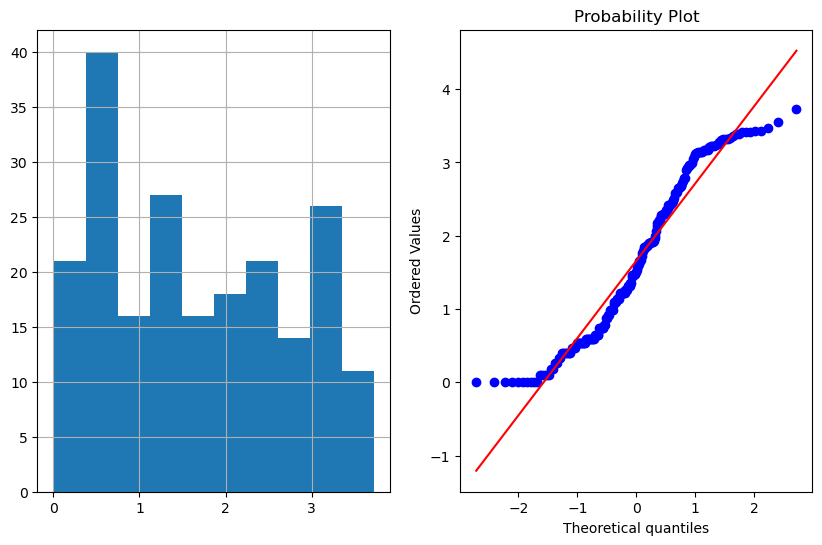

sodium_mg Skewness: 0.16419662237264893


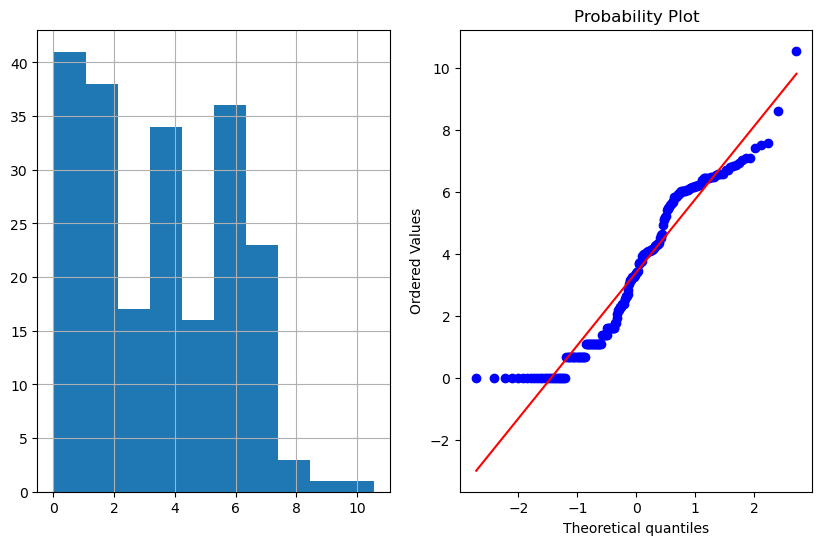

potassium_mg Skewness: -0.6703924577999936


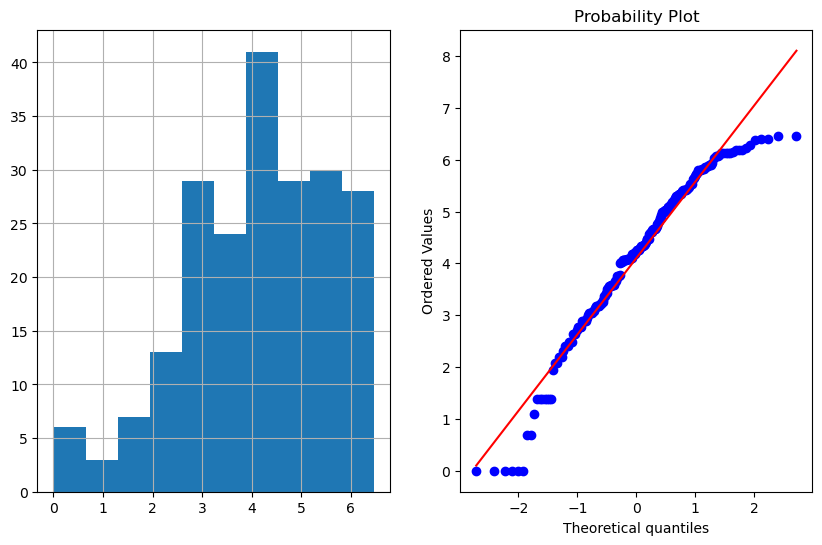

cholesterol_mg Skewness: 1.3096468127859755


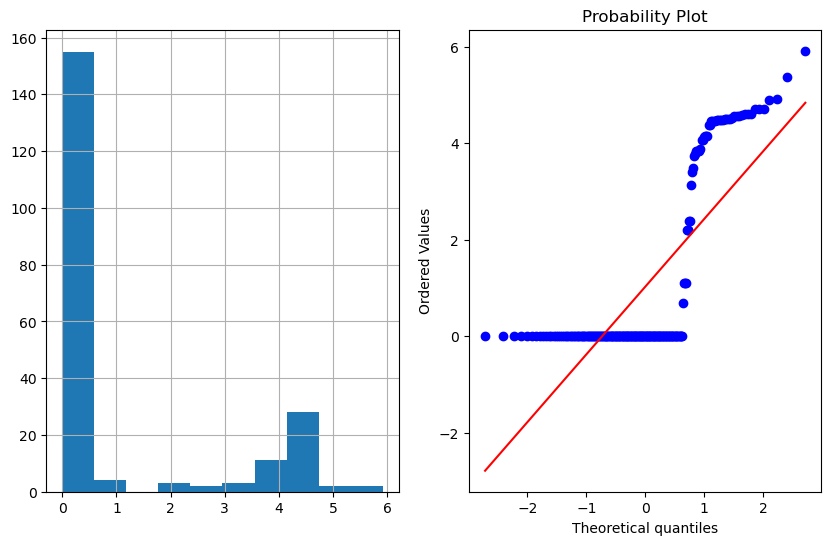

carbohydrates_total_g Skewness: -0.35931251493319344


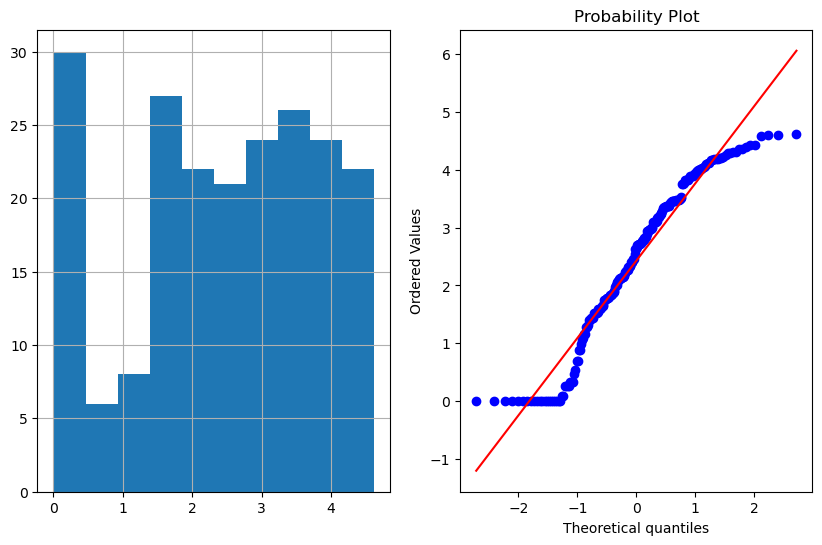

fiber_g Skewness: 0.8950083002207677


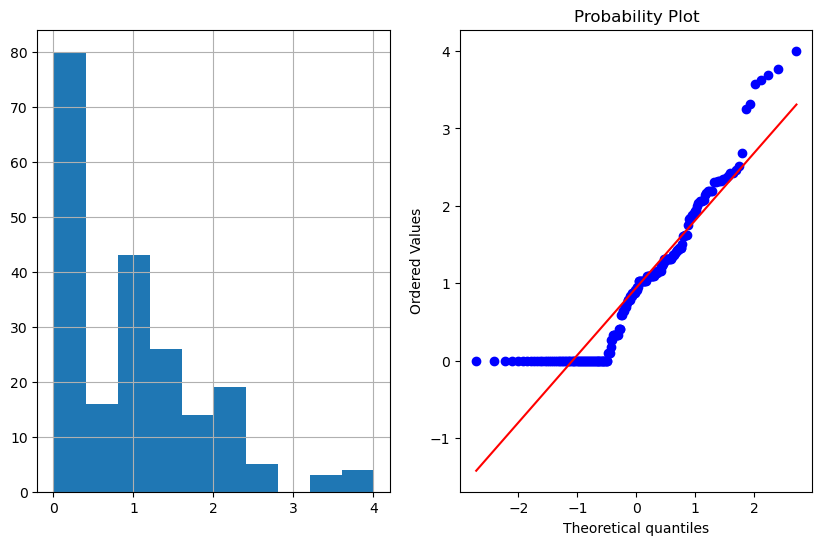

sugar_g Skewness: 1.0596044379311271


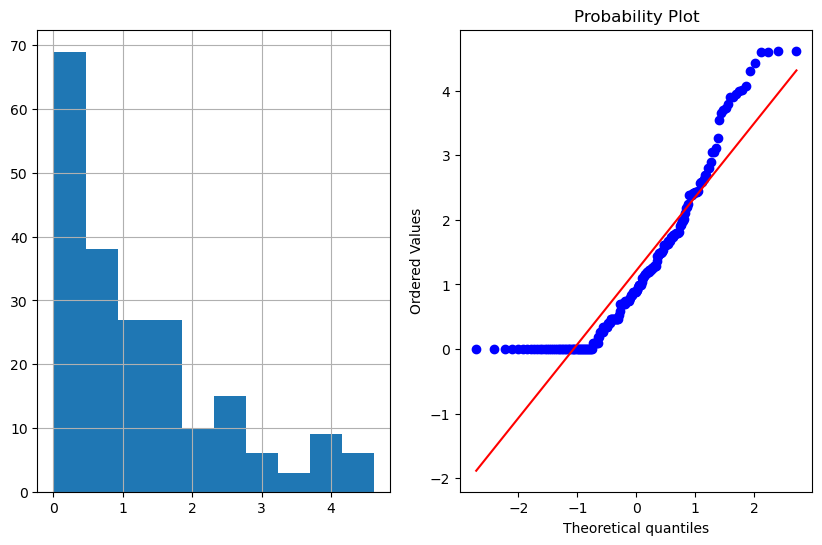

In [10]:
for col in df:
    print(col,'Skewness:',skew(df[col]))
    plot_data(df,col)
    plt.show()

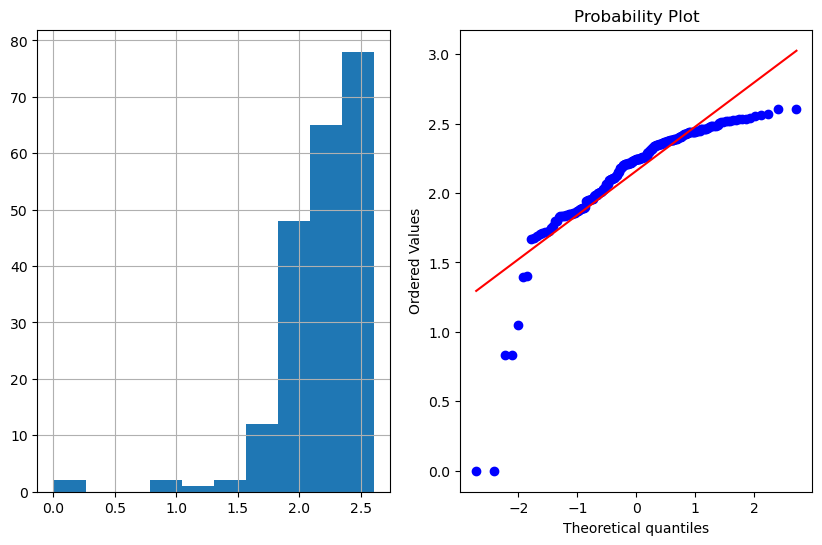

sugar_g Skewness: 1.0596044379311271


In [11]:
df['calories']=np.sqrt(df['calories'])
plot_data(df,'calories')
print(col,'Skewness:',skew(df[col]))

In [15]:
dff = product_data.copy()
items = ["product_id","product","usual_storage","serving_size_g","shelf_life"]
dff = dff.drop(items,axis=1)
dff

,calories,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
0,154.1,0.6,0.1,5.3,4,75,0,30.6,1.3,1.1
1,44.7,0.2,0.0,1.4,2,35,0,10.1,1.4,4.7
2,385.6,0.0,0.0,0.0,0,0,0,99.8,0.0,100.1
3,58.3,3.4,0.2,3.8,1125,106,0,5.7,4.0,1.0
4,24.6,0.3,0.0,1.2,472,26,0,5.4,1.5,3.6
...,...,...,...,...,...,...,...,...,...,...
205,35.0,0.4,0.1,2.4,41,65,0,7.3,3.3,1.4
206,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
207,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
208,28.0,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3


# Kolmogorov Smirnov test

# The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.

# If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

# If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution

# If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

In [16]:
# Before skweness
dff = norm.rvs(size=1000)
ks_statistic, p_value = kstest(dff, 'norm')
print(ks_statistic, p_value)

0.01671833067817513 0.9381202387321771


In [13]:
# After Skweness
df = norm.rvs(size=1000)
ks_statistic, p_value = kstest(df, 'norm')
print(ks_statistic, p_value)

0.026954083523385908 0.4538725116895088


# Shapiro Wilk Test
# Interpretation
# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [17]:
# Before Skweness
dff = norm.rvs(size=210)
shapiro(dff)

ShapiroResult(statistic=0.9948906302452087, pvalue=0.7012848258018494)

In [14]:
# After removing Skweness
df = norm.rvs(size=210)
shapiro(df)

ShapiroResult(statistic=0.993876039981842, pvalue=0.5439178347587585)

In [3]:
interaction_data =pd.read_excel("D:/UoE_Notes/Assignment/Group_Project/Final_Data/interaction.xlsx")
interaction_data

,Session_Id,customer_id,product_id,Types
0,6f87bf71-aba7-11ed-99f3-9f24bacbc83d,1,97,Cart
1,6f87bf72-aba7-11ed-beac-9f24bacbc83d,1,146,Views
2,6f87bf73-aba7-11ed-8f45-9f24bacbc83d,2,208,Cart
3,6f87bf74-aba7-11ed-8c4c-9f24bacbc83d,2,185,Views
4,6f87bf75-aba7-11ed-98f0-9f24bacbc83d,2,156,Cart
...,...,...,...,...
995,6f88f750-aba7-11ed-b069-9f24bacbc83d,207,125,Purchase
996,6f88f751-aba7-11ed-bde8-9f24bacbc83d,207,167,Views
997,6f88f752-aba7-11ed-912b-9f24bacbc83d,208,111,Purchase
998,6f88f753-aba7-11ed-a869-9f24bacbc83d,209,148,Purchase


In [7]:
df = interaction_data.merge(product_data,left_on="product_id",right_on="product_id")
df

,Session_Id,customer_id,product_id,Types,product,shelf_life,usual_storage,calories,serving_size_g,fat_total_g,fat_saturated_g,protein_g,sodium_mg,potassium_mg,cholesterol_mg,carbohydrates_total_g,fiber_g,sugar_g
0,6f87bf71-aba7-11ed-99f3-9f24bacbc83d,1,97,Cart,butter,25.0,fridge,0.0,100,0.0,0.0,0.0,4,0,0,0.0,0.0,0.0
1,6f87c0e7-aba7-11ed-8f8c-9f24bacbc83d,80,97,Cart,butter,25.0,fridge,0.0,100,0.0,0.0,0.0,4,0,0,0.0,0.0,0.0
2,6f87c145-aba7-11ed-b831-9f24bacbc83d,99,97,Views,butter,25.0,fridge,0.0,100,0.0,0.0,0.0,4,0,0,0.0,0.0,0.0
3,6f87c1db-aba7-11ed-9e6e-9f24bacbc83d,129,97,Purchase,butter,25.0,fridge,0.0,100,0.0,0.0,0.0,4,0,0,0.0,0.0,0.0
4,6f88f6bb-aba7-11ed-8985-9f24bacbc83d,174,97,Purchase,butter,25.0,fridge,0.0,100,0.0,0.0,0.0,4,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6f88f693-aba7-11ed-9c8f-9f24bacbc83d,165,70,Purchase,brown bread,NaN,pantry,269.6,100,3.2,0.8,10.8,511,147,0,48.2,4.0,5.8
996,6f88f6ff-aba7-11ed-8378-9f24bacbc83d,190,118,Cart,potato,13.0,fridge,92.7,100,0.1,0.0,2.5,10,70,0,21.0,2.2,1.2
997,6f88f700-aba7-11ed-bf29-9f24bacbc83d,191,207,Purchase,mushroom,7.0,fridge,28.0,100,0.5,0.1,2.1,1,87,0,5.3,2.1,2.3
998,6f88f70c-aba7-11ed-a5f1-9f24bacbc83d,194,54,Views,oat biscuits,NaN,pantry,2.0,100,0.0,0.0,0.1,4,3,0,0.3,0.0,0.0


In [24]:
count_unique = df.groupby('Types')['product'].nunique()   # Apply unique function
print(count_unique)

Types
Cart        169
Purchase    163
Views       167
Name: product, dtype: int64


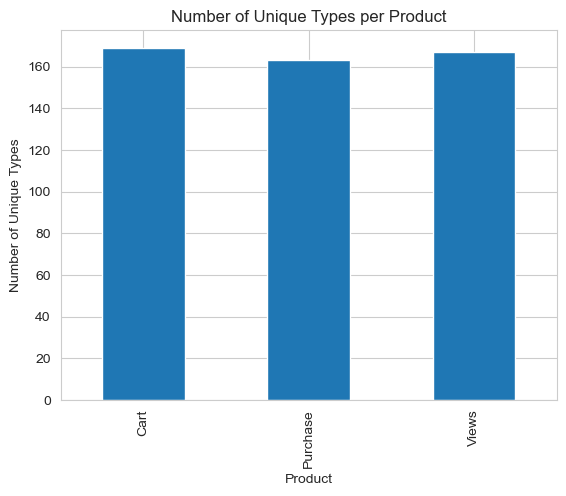

In [25]:
# Plot the count_unique variable as a bar chart
count_unique.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Product')

# Set the y-axis label
plt.ylabel('Number of Unique Types')

# Set the title
plt.title('Number of Unique Types per Product')

# Show the plot
plt.show()


In [23]:
df["product"].value_counts()

cooked pork          15
peanut               13
cooked mushroom      11
bell pepper          11
cheese               11
                     ..
mustard               1
ginger biscuits       1
strawberry            1
milk                  1
lemon tuna fillet     1
Name: product, Length: 205, dtype: int64

<AxesSubplot:>

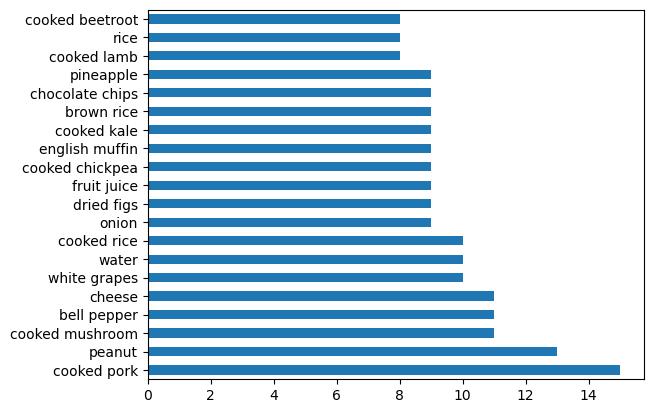

In [14]:
df["product"].value_counts()[:20].plot(kind='barh')

In [35]:
df["customer_id"].value_counts()[:20].plot(kind='barh')

KeyError: 'customer_id'